## Packages Required

In [301]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
# data preprocessing

from sklearn.preprocessing import StandardScaler


# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


import statsmodels.api as sm



In [302]:
data = pd.read_csv('../data/candy-data.csv')

data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [304]:
#create a new column called winerank that ranks the winpercent column into 3 bins, 1,2,3 for 0 to 33, 33 to 66, 66 to 100
data['winrank'] = data['winpercent'].apply(lambda x: 3 if x < 42 else (2 if x < 60 else 1))
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winrank
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,3
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


In [305]:
#winrank value counts
data['winrank'].value_counts()


winrank
2    36
3    28
1    21
Name: count, dtype: int64

## **EDA**

In [306]:

data = data.drop(["competitorname"],axis=1)
data = data.drop(["winpercent"],axis=1)

In [307]:
!pip install seaborn
import seaborn as sns



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


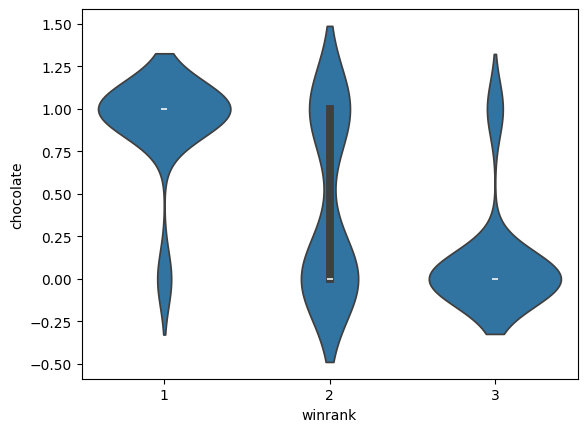

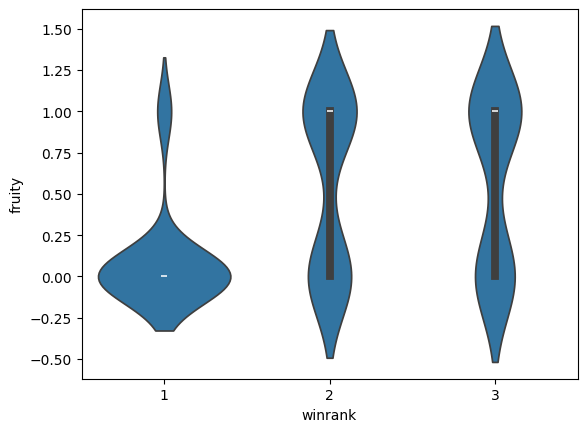

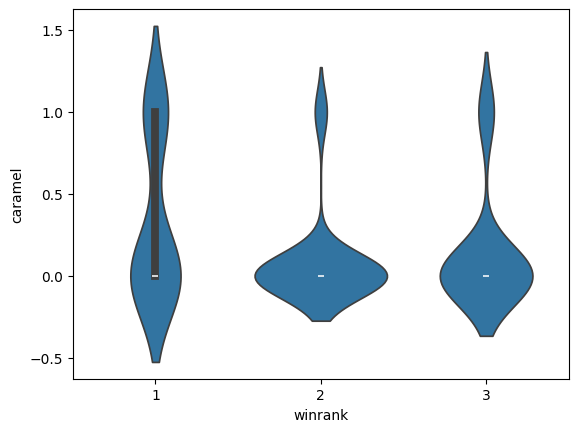

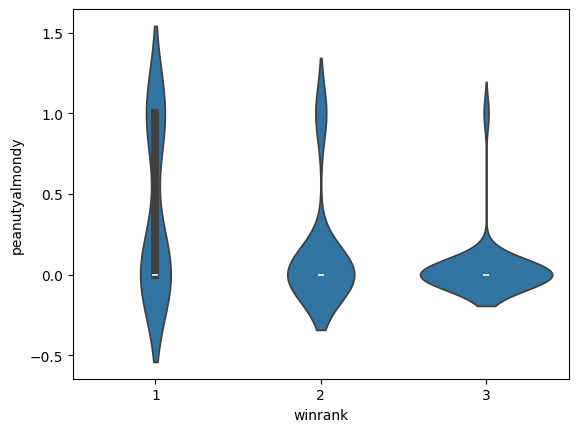

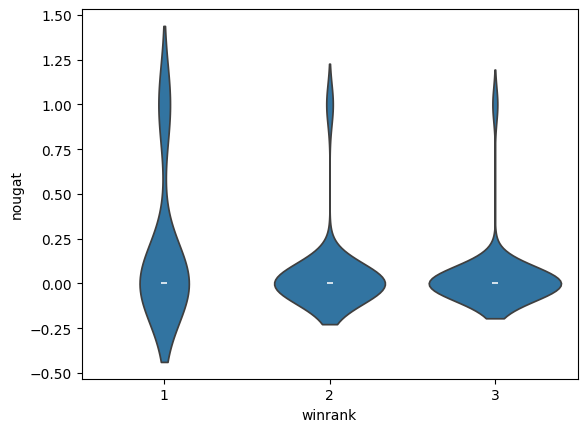

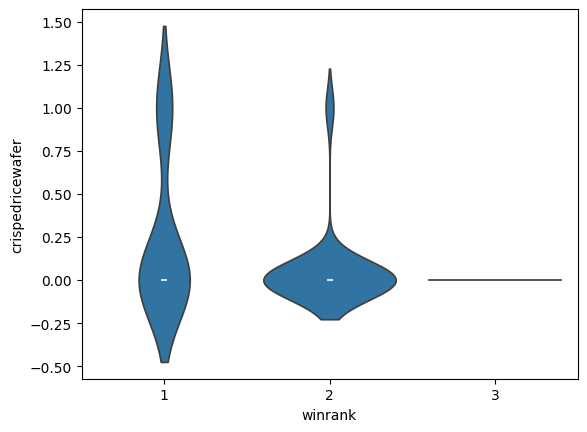

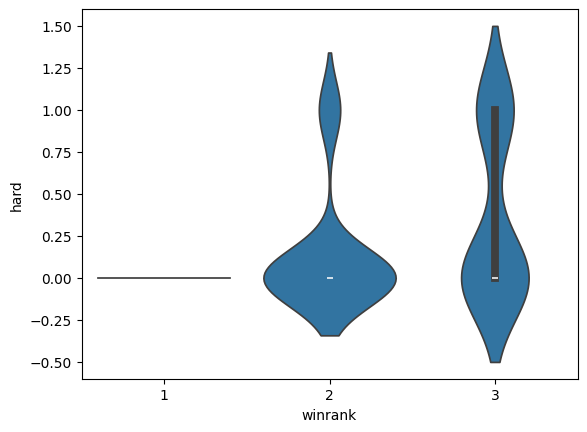

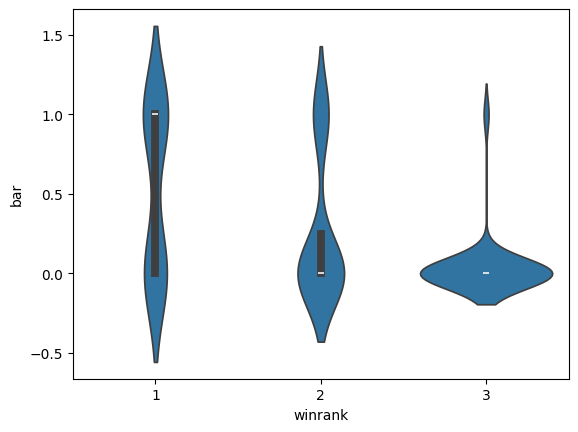

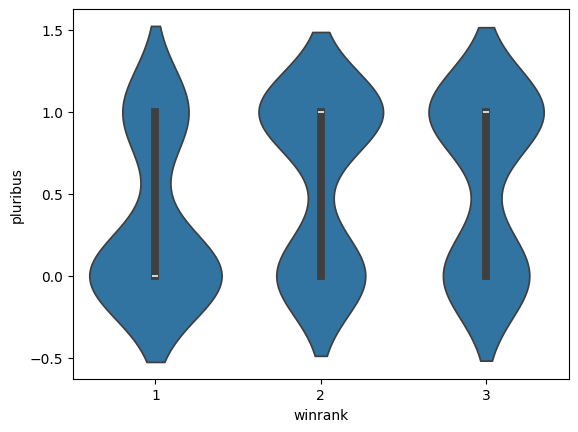

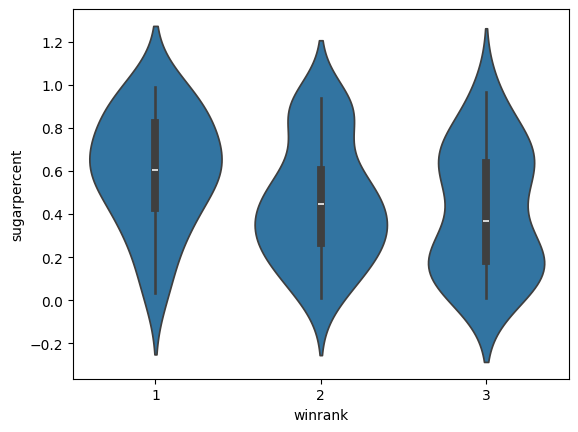

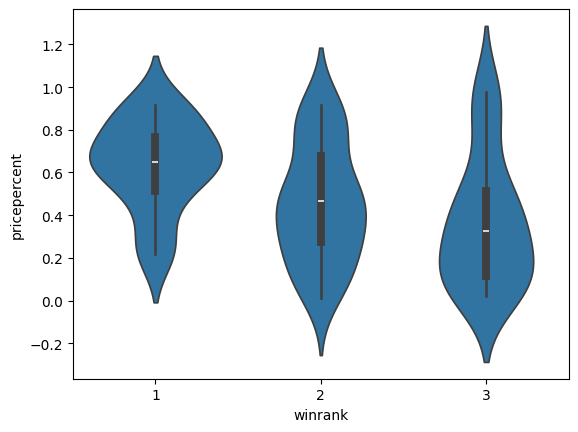

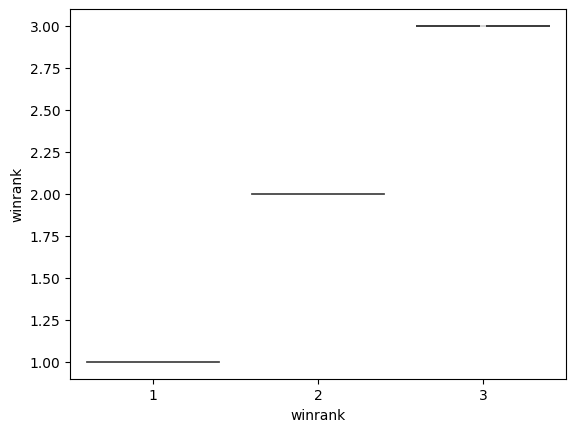

In [308]:
# Violin plots for each feature, using winrank as hue
for i in data.columns:
    sns.violinplot(x='winrank',y=i,data=data)
    plt.show()
    




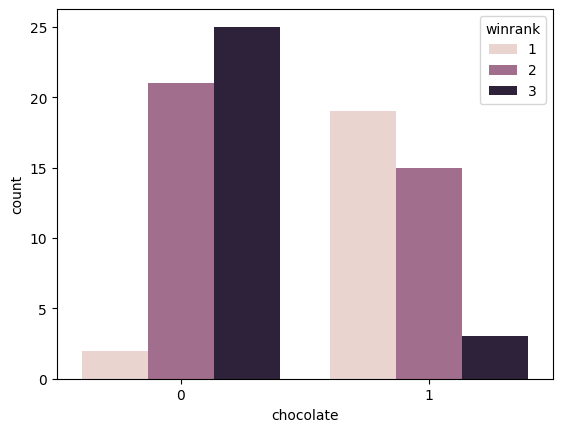

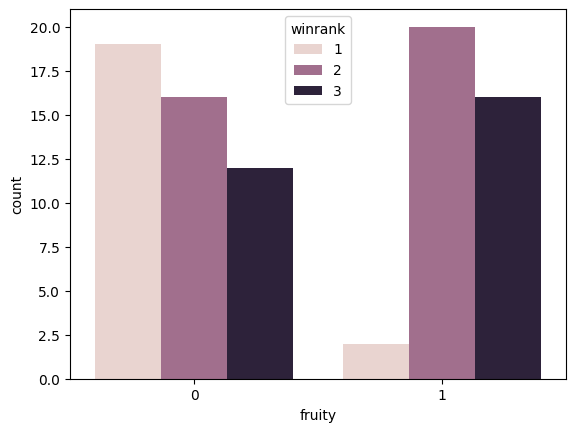

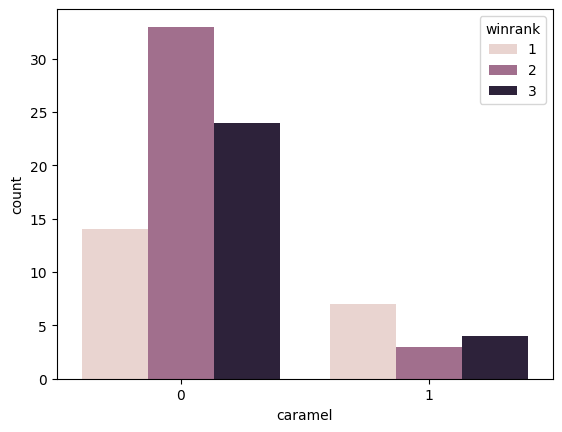

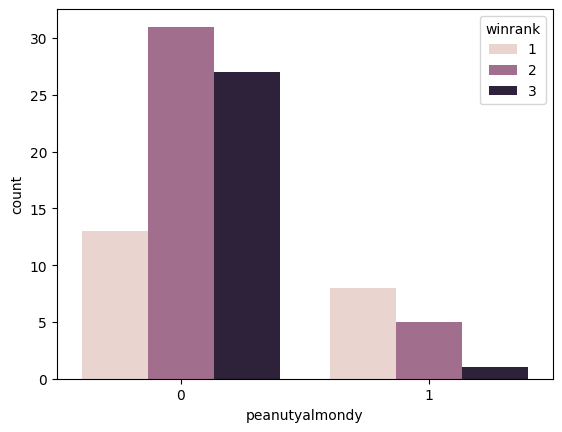

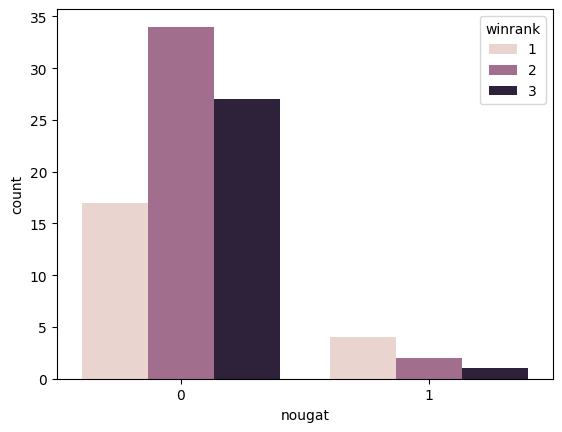

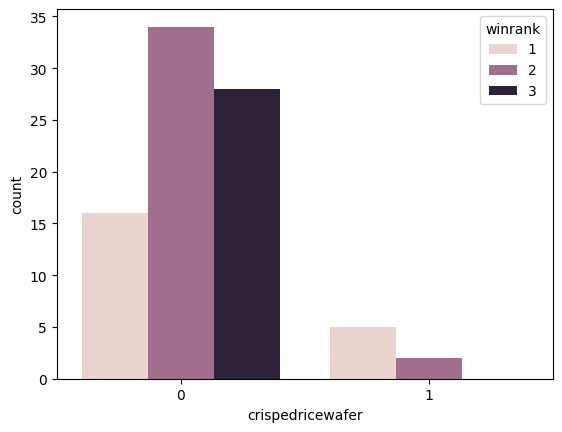

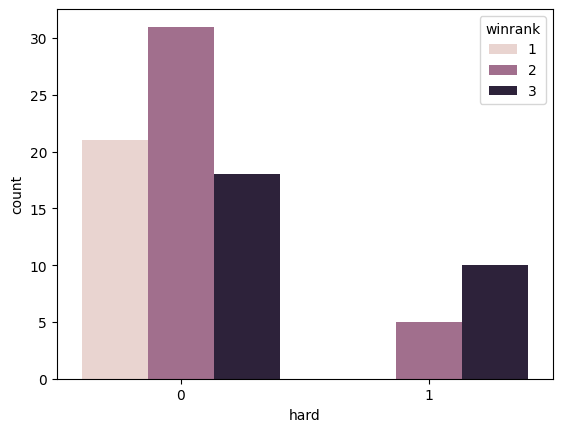

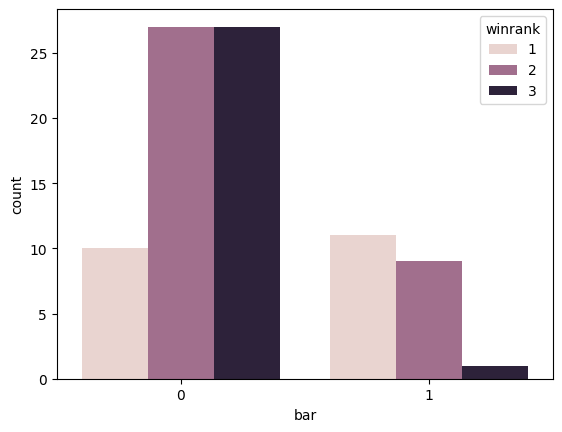

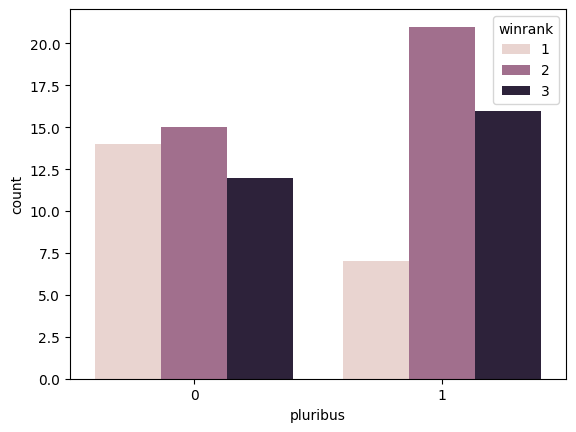

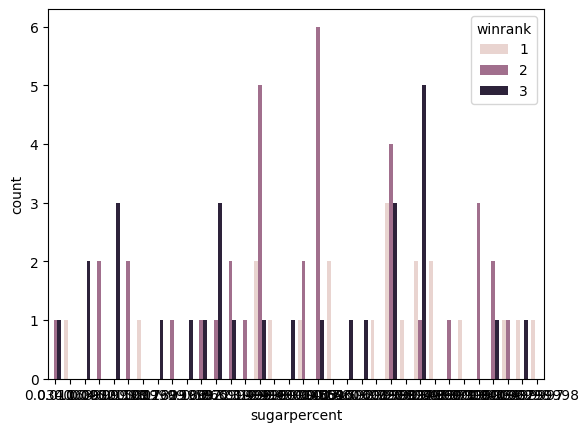

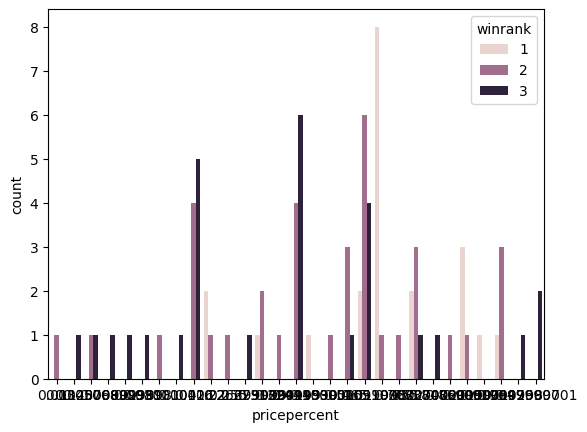

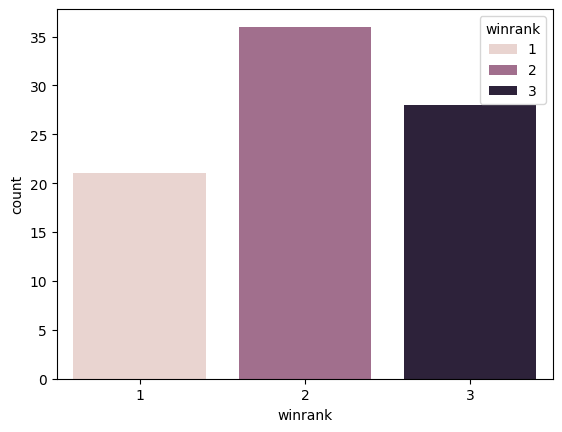

In [309]:
# bar charts for each feature, stacked by winrank
for i in data.columns:
    sns.countplot(x=i,hue='winrank',data=data)
    plt.show()

## **Model prepration**

Split the data using the built in function train_test_split. You can specify the size of the split

In [310]:
#separate the target and the features
X = data.drop(["winrank"],axis=1)
y = data["winrank"]

# Split the data into a training and test set using the train_test_split and 20% of the data for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [311]:
# get the count of y
y_test.value_counts()


winrank
2    10
3     9
1     3
Name: count, dtype: int64

## Scaling
The Nearest Neighbor algorithm uses "distance" so variables with a larger scale will be more heavily weighted. Scaling our X values into a new dataframe will alieviate this.

Standardize features by removing the mean and scaling to unit variance

This means, given an input x, transform it to (x-mean)/std (where all dimensions and operations are well defined).

So even if your input values are all positive, removing the mean can make some of them negative:

In [312]:
#create a new dataframe with scaled features, but only for non-categorical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X)
X_scaled.head()

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [313]:
# create a class that we can use to track the performance of our different models
# it should store the model name, the model itself, the confusion matrix, the accuracy, the precision, the recall, the f1 score, and the roc_auc score
class ModelPerformance:
    def __init__(self,name,model,confusion_matrix=None,accuracy=None,precision=None,recall=None,f1=None,roc_auc=None):
        self.name = name
        self.model = model
        self.confusion_matrix = confusion_matrix
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1
        self.roc_auc = roc_auc
        

        # a function that will print out the performance metrics
    def print_performance(self):
        print(f"Model: {self.name}")
        print(f"Accuracy: {self.accuracy}")
        print(f"Precision: {self.precision}")
        print(f"Recall: {self.recall}")
        print(f"F1 Score: {self.f1}")
        print(f"ROC AUC: {self.roc_auc}")
        print(f"Confusion Matrix: ")
        print(self.confusion_matrix)

        # a function that will plot the confusion matrix
    def plot_confusion_matrix(self):
        sns.heatmap(self.confusion_matrix,annot=True,fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # a function that will print out the classification report
    def print_classification_report(self,X_test,y_test):
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test,y_pred))

        

# create a list to store the performance of each model
model_performances = []

#create a function to add to the list that replaces the performance of the model if it already exists based on name
def add_to_model_performances(model_performances,model_performance):
    names = [model.name for model in model_performances]
    if model_performance.name in names:
        index = names.index(model_performance.name)
        model_performances[index] = model_performance
    else:
        model_performances.append(model_performance)


## **ML models**

Here we will try different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. LDA
3. QDA
4. Naive Bayes
5. K-nearest neighbor



In [314]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[3 0 0]
 [3 6 1]
 [1 3 5]]


Accuracy of Logistic Regression: 63.63636363636363 

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.67      0.60      0.63        10
           3       0.83      0.56      0.67         9

    accuracy                           0.64        22
   macro avg       0.64      0.72      0.63        22
weighted avg       0.70      0.64      0.64        22



In [315]:
# calculate overall accuracy, precision, recall, f1-score
lr_acc_score = accuracy_score(y_test, lr_predict)
lr_precision = precision_score(y_test, lr_predict, average='weighted')
lr_recall = recall_score(y_test, lr_predict, average='weighted')
lr_f1_score = f1_score(y_test, lr_predict, average='weighted')
print("Accuracy of Logistic Regression:",lr_acc_score*100)
print("Precision of Logistic Regression:",lr_precision)
print("Recall of Logistic Regression:",lr_recall)
print("F1 Score of Logistic Regression:",lr_f1_score)

# store the performance of this model in our list
model_performance = ModelPerformance(m1,lr,lr_conf_matrix,lr_acc_score,lr_precision,lr_recall,lr_f1_score,0)
add_to_model_performances(model_performances,model_performance)




Accuracy of Logistic Regression: 63.63636363636363
Precision of Logistic Regression: 0.7023809523809524
Recall of Logistic Regression: 0.6363636363636364
F1 Score of Logistic Regression: 0.6416267942583732


In [316]:
# loop through models and print out their performance metrics
for model_performance in model_performances:
    model_performance.print_performance()
    


Model: Logistic Regression
Accuracy: 0.6363636363636364
Precision: 0.7023809523809524
Recall: 0.6363636363636364
F1 Score: 0.6416267942583732
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [3 6 1]
 [1 3 5]]


Logistic regression doens't really have a notion of "feature importance" but you can use the coefficient to get a sense of which predictor has the largest effect per unit increase

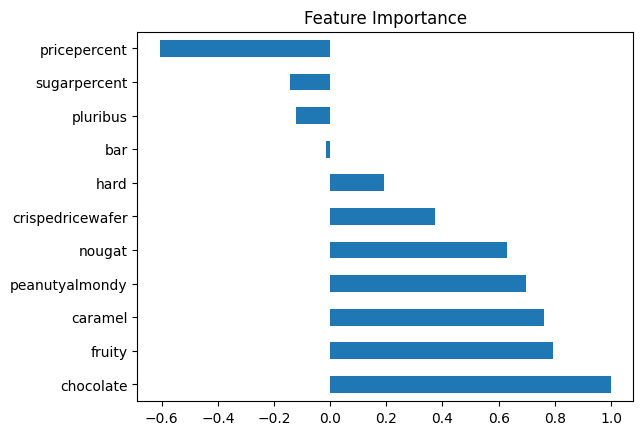

In [317]:
# logistic 
importance = model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
#set x axis values to the column names from the original dataset
plt.yticks(ticks=np.arange(len(X.columns)),labels=X.columns)
plt.show()

## LDA

In [318]:
#build a lda model on x_train and y_train
m2 = 'LDA'
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
lda_predict = lda.predict(X_test)
lda_conf_matrix = confusion_matrix(y_test, lda_predict)

# calculate overall accuracy, precision, recall, f1-score
lda_acc_score = accuracy_score(y_test, lda_predict)
lda_precision = precision_score(y_test, lda_predict, average='weighted')
lda_recall = recall_score(y_test, lda_predict, average='weighted')
lda_f1_score = f1_score(y_test, lda_predict, average='weighted')
print("Accuracy of LDA:",lda_acc_score*100)
print("Precision of LDA:",lda_precision)
print("Recall of LDA:",lda_recall)
print("F1 Score of LDA:",lda_f1_score)
#print confusion matrix
print(lda_conf_matrix)

#store in model performance
lda_model_performance = ModelPerformance(m2,lda,lda_conf_matrix,lda_acc_score,lda_precision,lda_recall,lda_f1_score,0)
add_to_model_performances(model_performances,lda_model_performance)


Accuracy of LDA: 68.18181818181817
Precision of LDA: 0.75
Recall of LDA: 0.6818181818181818
F1 Score of LDA: 0.6916666666666665
[[3 0 0]
 [3 6 1]
 [1 2 6]]


In [319]:
# loop through model performances and print out the performance of each model
for model in model_performances:
    model.print_performance()


Model: Logistic Regression
Accuracy: 0.6363636363636364
Precision: 0.7023809523809524
Recall: 0.6363636363636364
F1 Score: 0.6416267942583732
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [3 6 1]
 [1 3 5]]
Model: LDA
Accuracy: 0.6818181818181818
Precision: 0.75
Recall: 0.6818181818181818
F1 Score: 0.6916666666666665
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [3 6 1]
 [1 2 6]]


In [320]:
# repeat same steps for QDA
m3 = 'QDA'
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
qda_predict = qda.predict(X_test)
qda_conf_matrix = confusion_matrix(y_test, qda_predict)

# calculate overall accuracy, precision, recall, f1-score
qda_acc_score = accuracy_score(y_test, qda_predict)
qda_precision = precision_score(y_test, qda_predict, average='weighted')
qda_recall = recall_score(y_test, qda_predict, average='weighted')
qda_f1_score = f1_score(y_test, qda_predict, average='weighted')
print("Accuracy of QDA:",qda_acc_score*100)
print("Precision of QDA:",qda_precision)
print("Recall of QDA:",qda_recall)
print("F1 Score of QDA:",qda_f1_score)
#print confusion matrix
print(qda_conf_matrix)

#store it in model performance
qda_model_performance = ModelPerformance(m3,qda,qda_conf_matrix,qda_acc_score,qda_precision,qda_recall,qda_f1_score,0)
add_to_model_performances(model_performances,qda_model_performance)



Accuracy of QDA: 45.45454545454545
Precision of QDA: 0.6772727272727272
Recall of QDA: 0.45454545454545453
F1 Score of QDA: 0.43897012078830266
[[3 0 0]
 [5 5 0]
 [2 5 2]]


/Users/ericcoopey/repos/dsa411_s25/dsa411/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/ericcoopey/repos/dsa411_s25/dsa411/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/ericcoopey/repos/dsa411_s25/dsa411/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [321]:

# repeat but with naive bayes
m4 = 'Naive Bayes'
nb = GaussianNB()
model = nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)

# calculate overall accuracy, precision, recall, f1-score
nb_acc_score = accuracy_score(y_test, nb_predict)
nb_precision = precision_score(y_test, nb_predict, average='weighted')
nb_recall = recall_score(y_test, nb_predict, average='weighted')
nb_f1_score = f1_score(y_test, nb_predict, average='weighted')
print("Accuracy of Naive Bayes:",nb_acc_score*100)
print("Precision of Naive Bayes:",nb_precision)
print("Recall of Naive Bayes:",nb_recall)
print("F1 Score of Naive Bayes:",nb_f1_score)
#print confusion matrix
print(nb_conf_matrix)

#store it in model performance
nb_model_performance = ModelPerformance(m4,nb,nb_conf_matrix,nb_acc_score,nb_precision,nb_recall,nb_f1_score,0)
add_to_model_performances(model_performances,nb_model_performance)


Accuracy of Naive Bayes: 45.45454545454545
Precision of Naive Bayes: 0.2590909090909091
Recall of Naive Bayes: 0.45454545454545453
F1 Score of Naive Bayes: 0.32954545454545453
[[3 0 0]
 [2 0 8]
 [1 1 7]]


In [322]:
# use KNN to predict the y values using X_scaled
m5 = 'KNN'
knn = KNeighborsClassifier()
model = knn.fit(X_train_scale, y_train_scale)
knn_predict = knn.predict(X_test_scale)
knn_conf_matrix = confusion_matrix(y_test_scale, knn_predict)

# calculate overall accuracy, precision, recall, f1-score
knn_acc_score = accuracy_score(y_test_scale, knn_predict)
knn_precision = precision_score(y_test_scale, knn_predict, average='weighted') 
knn_recall = recall_score(y_test_scale, knn_predict, average='weighted')
knn_f1_score = f1_score(y_test_scale, knn_predict, average='weighted')
print("Accuracy of KNN:",knn_acc_score*100)
print("Precision of KNN:",knn_precision)
print("Recall of KNN:",knn_recall)
print("F1 Score of KNN:",knn_f1_score)
#print confusion matrix
print(knn_conf_matrix)

#store it in model performance
knn_model_performance = ModelPerformance(m5,knn,knn_conf_matrix,knn_acc_score,knn_precision,knn_recall,knn_f1_score,0)
add_to_model_performances(model_performances,knn_model_performance)



Accuracy of KNN: 54.54545454545454
Precision of KNN: 0.5287878787878788
Recall of KNN: 0.5454545454545454
F1 Score of KNN: 0.5
[[3 2 1]
 [0 8 1]
 [1 5 1]]


In [323]:
# loop through model performances and print out the performance of each model, ordering by F1 score descending
for model in sorted(model_performances,key=lambda x: x.f1,reverse=True):
    model.print_performance()
    

Model: LDA
Accuracy: 0.6818181818181818
Precision: 0.75
Recall: 0.6818181818181818
F1 Score: 0.6916666666666665
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [3 6 1]
 [1 2 6]]
Model: Logistic Regression
Accuracy: 0.6363636363636364
Precision: 0.7023809523809524
Recall: 0.6363636363636364
F1 Score: 0.6416267942583732
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [3 6 1]
 [1 3 5]]
Model: KNN
Accuracy: 0.5454545454545454
Precision: 0.5287878787878788
Recall: 0.5454545454545454
F1 Score: 0.5
ROC AUC: 0
Confusion Matrix: 
[[3 2 1]
 [0 8 1]
 [1 5 1]]
Model: QDA
Accuracy: 0.45454545454545453
Precision: 0.6772727272727272
Recall: 0.45454545454545453
F1 Score: 0.43897012078830266
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [5 5 0]
 [2 5 2]]
Model: Naive Bayes
Accuracy: 0.45454545454545453
Precision: 0.2590909090909091
Recall: 0.45454545454545453
F1 Score: 0.32954545454545453
ROC AUC: 0
Confusion Matrix: 
[[3 0 0]
 [2 0 8]
 [1 1 7]]


## USING KFolds to estimate true model performace

We can use the built in methods of KFold to try build a model for each split. Summing and averageing the errors allows us to estimate the true accuracy of the model.

In [327]:
#value count of winrank
data['winrank'].value_counts()

winrank
2    36
3    28
1    21
Name: count, dtype: int64

In [329]:
#import KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#use logistic regression
lr = LogisticRegression()

#This cross-validation object is a variation of KFold that returns stratified folds. 
# The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits=5)

#use the cross_val_score to get the scores of the model
scores = cross_val_score(LogisticRegression(random_state=42), X, y, scoring='accuracy', cv=skf)

#print the scores, precision, accuracy, recall, f1 score
print(scores)
print('Accuracy: ', scores.mean())
print('Precision: ', cross_val_score(lr, X, y, scoring='precision_weighted', cv=5).mean())
print('Recall: ', cross_val_score(lr, X, y, scoring='recall_weighted', cv=5).mean())
print('F1 Score: ', cross_val_score(lr, X, y, scoring='f1_weighted', cv=5).mean())




[0.52941176 0.76470588 0.47058824 0.52941176 0.64705882]
Accuracy:  0.588235294117647
Precision:  0.611416687887276
Recall:  0.588235294117647
F1 Score:  0.5819577884629787


In [330]:
#build final model using all the data
final_model = lr.fit(X,y)

#calculate the accuracy of the final model, precision, recall, f1 score
final_predict = final_model.predict(X)
final_conf_matrix = confusion_matrix(y, final_predict)
final_acc_score = accuracy_score(y, final_predict)
final_precision = precision_score(y, final_predict, average='weighted')
final_recall = recall_score(y, final_predict, average='weighted')
final_f1_score = f1_score(y, final_predict, average='weighted')
print("Accuracy of Full Model:",final_acc_score*100)
print("Precision of Full Model:",final_precision)
print("Recall of Full Model:",final_recall)
print("F1 Score of Full Model:",final_f1_score)
print(final_conf_matrix)


Accuracy of Full Model: 74.11764705882354
Precision of Full Model: 0.744363564823923
Recall of Full Model: 0.7411764705882353
F1 Score of Full Model: 0.7396061654608368
[[18  3  0]
 [ 4 27  5]
 [ 1  9 18]]
